# Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Data Import

In [47]:
dataset = pd.read_csv("../Datasets/healthcare_dataset.csv")
dataset.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


# Data Preprocessing

## Basic Stats to Understand Data

In [48]:
dataset.shape

(55500, 15)

In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

* Necessary steps to do:
    - Name column has to be prepared properly
    - Data of Admission & Discharge Date has to be converted to the Date Time type.

### Name Column trasformation

In [50]:
def normalize_name(name):
    return ' '.join(word.capitalize() for word in name.split())

dataset['Name'] = dataset['Name'].apply(normalize_name)

# Check
dataset['Name'].head()

0    Bobby Jackson
1     Leslie Terry
2      Danny Smith
3     Andrew Watts
4    Adrienne Bell
Name: Name, dtype: object

### Type conversetion of Date related columns

In [51]:
dataset['Date of Admission'] = pd.to_datetime(dataset['Date of Admission'])
dataset['Discharge Date'] = pd.to_datetime(dataset['Discharge Date'])

#Check
for i in [dataset['Discharge Date'], dataset['Date of Admission']]:
    i.info()

<class 'pandas.core.series.Series'>
RangeIndex: 55500 entries, 0 to 55499
Series name: Discharge Date
Non-Null Count  Dtype         
--------------  -----         
55500 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 433.7 KB
<class 'pandas.core.series.Series'>
RangeIndex: 55500 entries, 0 to 55499
Series name: Date of Admission
Non-Null Count  Dtype         
--------------  -----         
55500 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 433.7 KB


## Missing Value Check

In [52]:
dataset.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

* Clear, 😉

### Data Distribution Analysis

#### Age Feature

Text(0.5, 1.0, 'Age Distribution')

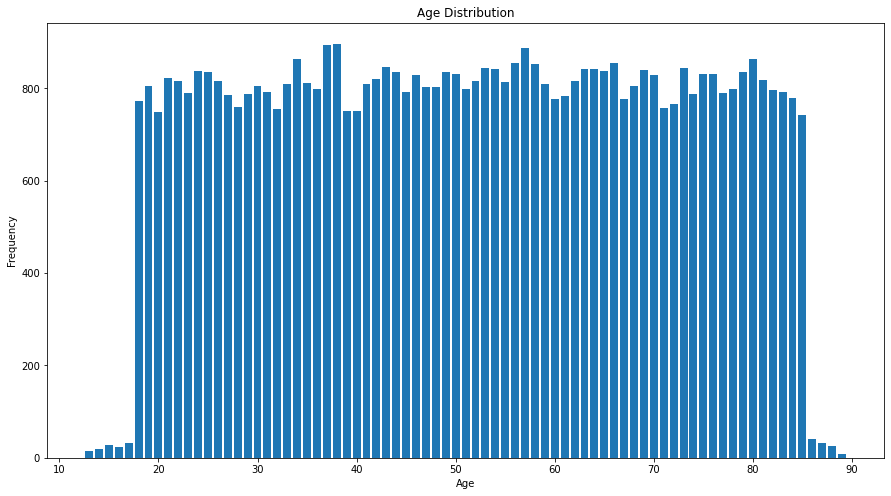

In [53]:
f, ax = plt.subplots(figsize=(15, 8))
ax.bar(x = dataset['Age'].value_counts().index, height = dataset['Age'].value_counts())
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title("Age Distribution")

#### Gender Feature

Text(0.5, 1.0, 'Gender Distribution')

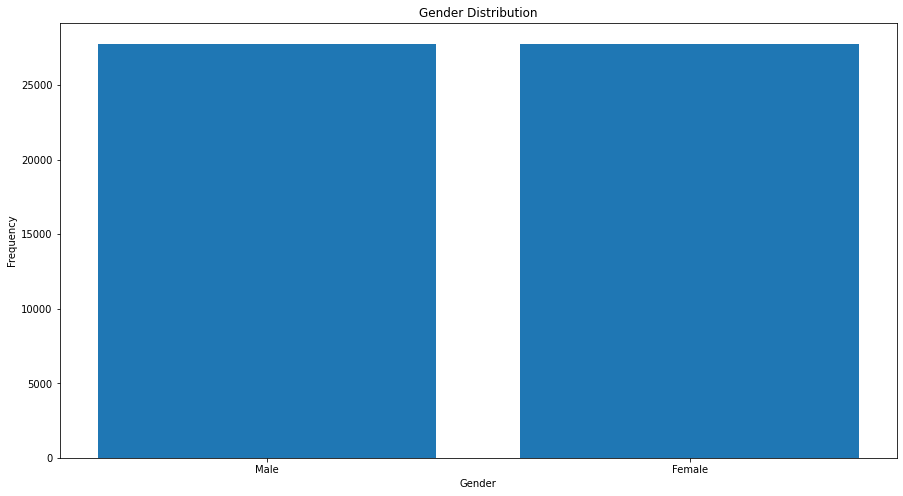

In [54]:
f, ax = plt.subplots(figsize=(15, 8))
ax.bar(x = dataset['Gender'].value_counts().index, height = dataset['Gender'].value_counts())
ax.set_xlabel('Gender')
ax.set_ylabel('Frequency')
ax.set_title("Gender Distribution")

#### Blood Type

Text(0.5, 1.0, 'Blood Type Distribution')

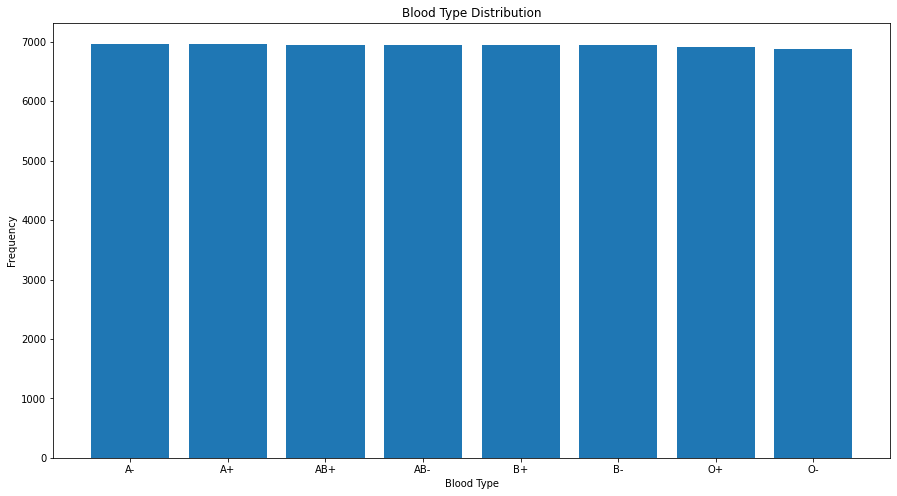

In [55]:
f, ax = plt.subplots(figsize=(15, 8))
ax.bar(x = dataset['Blood Type'].value_counts().index, height = dataset['Blood Type'].value_counts())
ax.set_xlabel('Blood Type')
ax.set_ylabel('Frequency')
ax.set_title("Blood Type Distribution")

#### Medical Condition

Text(0.5, 1.0, 'Medical Condition Distribution')

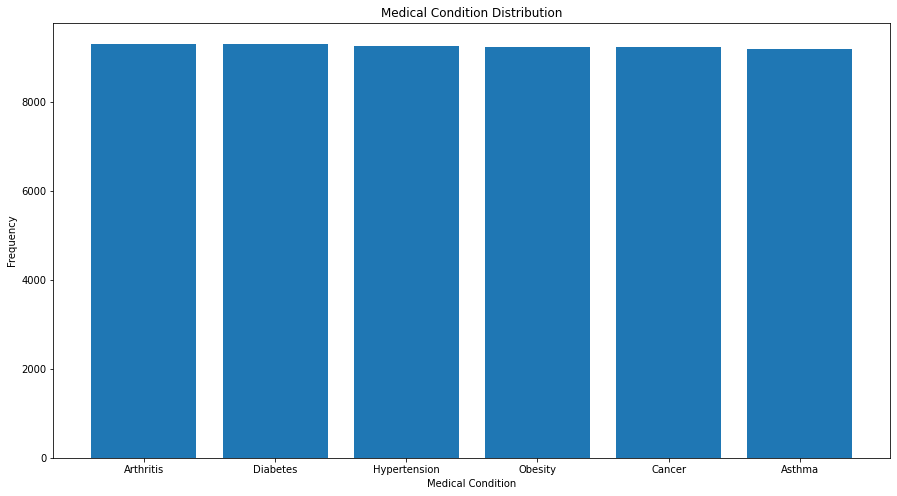

In [56]:
f, ax = plt.subplots(figsize=(15, 8))
ax.bar(x = dataset['Medical Condition'].value_counts().index, height = dataset['Medical Condition'].value_counts())
ax.set_xlabel('Medical Condition')
ax.set_ylabel('Frequency')
ax.set_title("Medical Condition Distribution")

#### Doctor Feature

In [57]:
len(dataset['Doctor'].unique())

40341

#### Hostpital Feature

In [58]:
len(dataset['Hospital'].unique())

39876

#### Insurance Provider Feature

Text(0.5, 1.0, 'Insurance Provider Distribution')

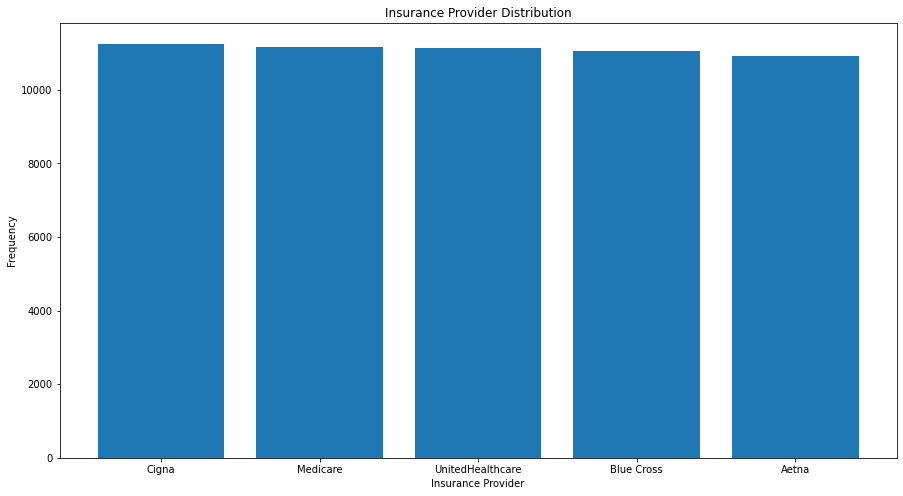

In [60]:
f, ax = plt.subplots(figsize=(15, 8))
ax.bar(x = dataset['Insurance Provider'].value_counts().index, height = dataset['Insurance Provider'].value_counts())
ax.set_xlabel('Insurance Provider')
ax.set_ylabel('Frequency')
ax.set_title("Insurance Provider Distribution")

#### Room Number Feature

In [67]:
len(dataset['Room Number'].unique())

400

#### Admission Type Feature

Text(0.5, 1.0, 'Admission Type Distribution')

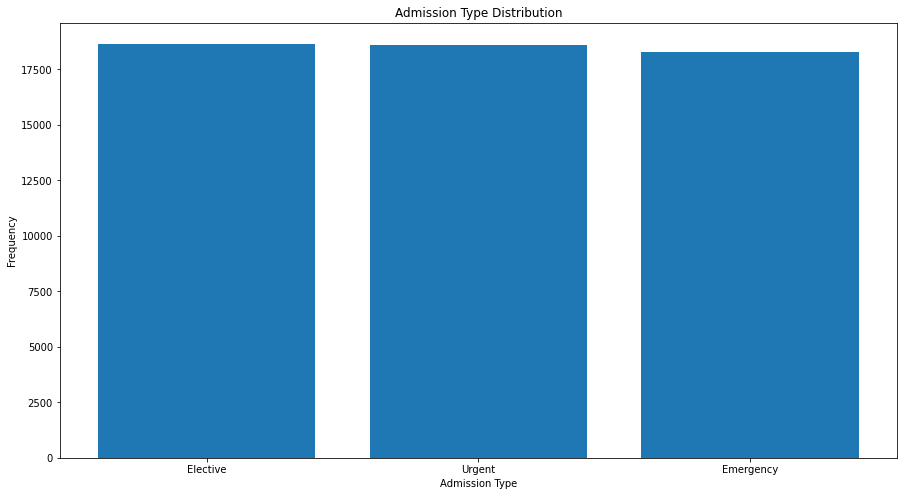

In [69]:
f, ax = plt.subplots(figsize=(15, 8))
ax.bar(x = dataset['Admission Type'].value_counts().index, height = dataset['Admission Type'].value_counts())
ax.set_xlabel('Admission Type')
ax.set_ylabel('Frequency')
ax.set_title("Admission Type Distribution")

#### Test Results Feature

Text(0.5, 1.0, 'Test Results Distribution')

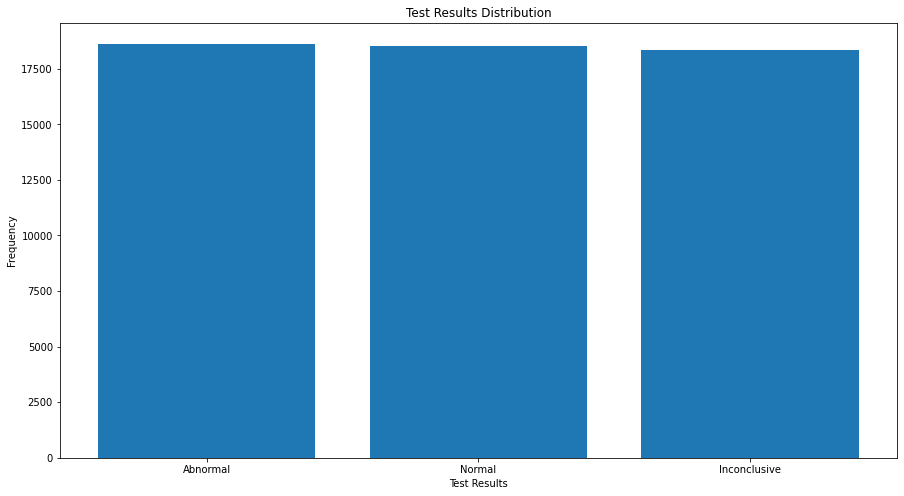

In [73]:
f, ax = plt.subplots(figsize=(15, 8))
ax.bar(x = dataset['Test Results'].value_counts().index, height = dataset['Test Results'].value_counts())
ax.set_xlabel('Test Results')
ax.set_ylabel('Frequency')
ax.set_title("Test Results Distribution")

#### Medication Feature

Text(0.5, 1.0, 'Medication Distribution')

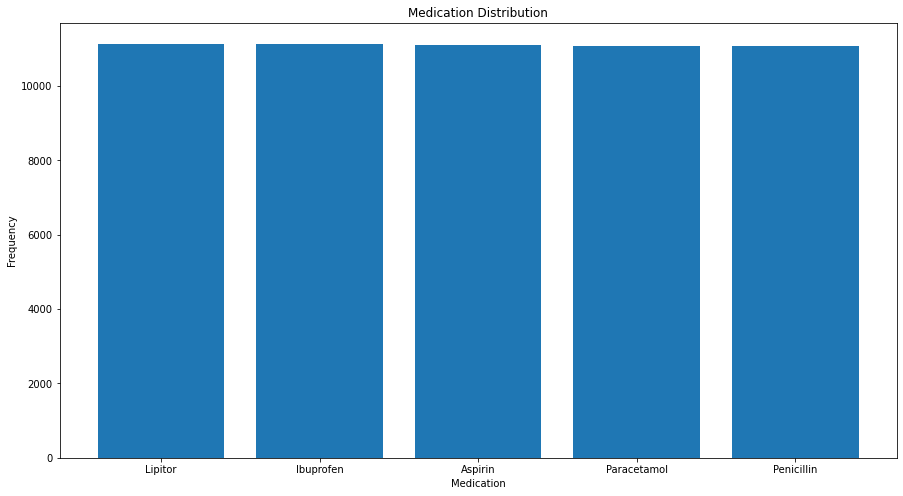

In [74]:
f, ax = plt.subplots(figsize=(15, 8))
ax.bar(x = dataset['Medication'].value_counts().index, height = dataset['Medication'].value_counts())
ax.set_xlabel('Medication')
ax.set_ylabel('Frequency')
ax.set_title("Medication Distribution")